In [9]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline 


df = pd.read_csv('/opt/prophet/vm_ram_search_dev.csv')
#df['y'] = np.log(df['y'])
df.head()
m = Prophet()
m.add_seasonality(name='quarterly',period=365*2,fourier_order=10)
m.fit(df);
future = m.make_future_dataframe(periods=365 *3, freq="D")
future.tail()
forecast = m.predict(future)
forecast.to_csv('/tmp/forecast_aia_ram.csv')
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()




INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
1705,2021-03-08,209419.403112,37027.810168,389608.665084
1706,2021-03-09,240212.656613,81774.090325,417454.623213
1707,2021-03-10,214010.690652,53951.945676,389459.613793
1708,2021-03-11,233002.186874,62525.805690,404995.929738
1709,2021-03-12,215077.688279,58836.359676,385222.443874


In [10]:
print(forecast)


             ds          trend    trend_lower    trend_upper     yhat_lower  \
0    2013-06-25   55445.171539   55445.171539   55445.171539 -144387.836447   
1    2013-06-26   55404.405821   55404.405821   55404.405821 -169255.077483   
2    2013-06-28   55322.874385   55322.874385   55322.874385 -172643.348616   
3    2013-07-01   55200.577232   55200.577232   55200.577232 -120699.562063   
4    2013-08-05   53773.777111   53773.777111   53773.777111    1539.186676   
5    2013-08-06   53733.011393   53733.011393   53733.011393   20087.046145   
6    2013-08-07   53692.245676   53692.245676   53692.245676   -1136.307629   
7    2013-08-12   53488.417087   53488.417087   53488.417087   -2203.291544   
8    2013-08-13   53447.651369   53447.651369   53447.651369   37931.792757   
9    2013-08-14   53406.885651   53406.885651   53406.885651  -10167.841219   
10   2013-08-15   53366.119934   53366.119934   53366.119934    4622.563589   
11   2013-08-16   53325.354216   53325.354216   5332

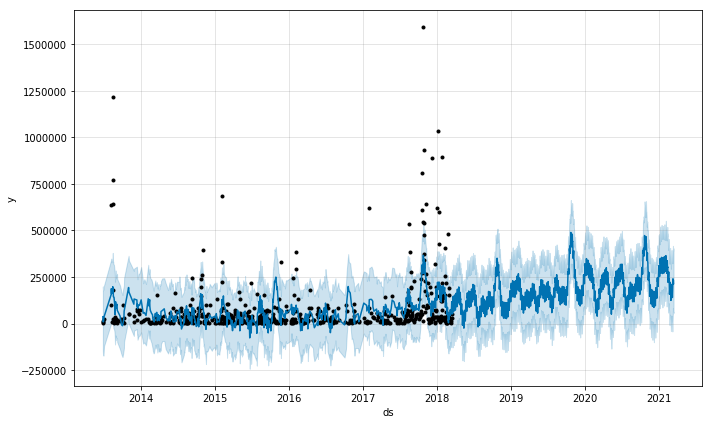

In [11]:
m.plot(forecast);


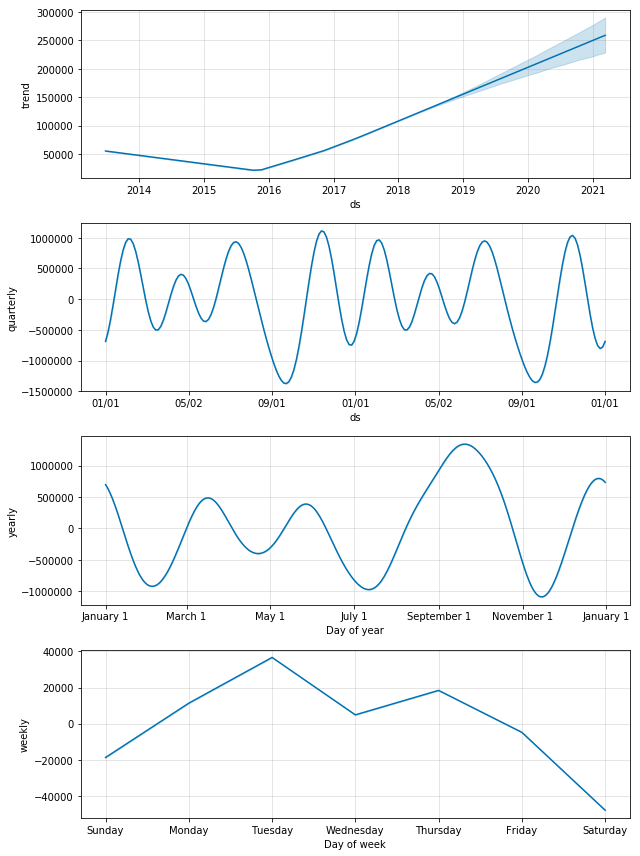

In [12]:
m.plot_components(forecast);